# Incidence du syndrome grippal

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence du syndrome grippal sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

In [30]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [31]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202442          7   3104     1332    4876       5           2   
1     202441          7   2010      361    3659       3           1   
2     202440          7   2125      725    3525       3           1   
3     202439          7   2898     1333    4463       4           2   
4     202438          7    751        0    1513       1           0   
5     202437          7    916       28    1804       1           0   
6     202436          7   2235      870    3600       3           1   
7     202435          7   1620      285    2955       2           0   
8     202434          7   2560      622    4498       4           1   
9     202433          7   1971      536    3406       3           1   
10    202432          7   4399     1944    6854       7           3   
11    202431          7   4500     2213    6787       7           4   
12    202430          7   7004     4278    9730      11           7   
13    202429          7   9270     6303   12237      14          10   
14    202428          7   9364     6498   12230      14          10   
15    202427          7  10247     7090   13404      15          10   
16    202426          7  14368    10399   18337      22          16   
17    202425          7  11174     8039   14309      17          12   
18    202424          7  12621     9357   15885      19          14   
19    202423          7  14657    11339   17975      22          17   
20    202422          7  11628     8361   14895      17          12   
21    202421          7   9701     6851   12551      15          11   
22    202420          7  13661    10209   17113      20          15   
23    202419          7  10083     6413   13753      15           9   
24    202418          7  13438     9514   17362      20          14   
25    202417          7  15303    11219   19387      23          17   
26    202416          7  18138    13540   22736      27          20   
27    202415          7  24929    17315   32543      37          26   
28    202414          7  16181    12544   19818      24          19   
29    202413          7  18322    14206   22438      27          21   
...      ...        ...    ...      ...     ...     ...         ...   
1738  199126          7  17608    11304   23912      31          20   
1739  199125          7  16169    10700   21638      28          18   
1740  199124          7  16171    10071   22271      28          17   
1741  199123          7  11947     7671   16223      21          13   
1742  199122          7  15452     9953   20951      27          17   
1743  199121          7  14903     8975   20831      26          16   
1744  199120          7  19053    12742   25364      34          23   
1745  199119          7  16739    11246   22232      29          19   
1746  199118          7  21385    13882   28888      38          25   
1747  199117          7  13462     8877   18047      24          16   
1748  199116          7  14857    10068   19646      26          18   
1749  199115          7  13975     9781   18169      25          18   
1750  199114          7  12265     7684   16846      22          14   
1751  199113          7   9567     6041   13093      17          11   
1752  199112          7  10864     7331   14397      19          13   
1753  199111          7  15574    11184   19964      27          19   
1754  199110          7  16643    11372   21914      29          20   
1755  199109          7  13741     8780   18702      24          15   
1756  199108          7  13289     8813   17765      23          15   
1757  199107          7  12337     8077   16597      22          15   
1758  199106          7  10877     7013   14741      19          12   
1759  199105          7  10442     6544   14340      18          11   
1760  199104          7   7913     4563   11263      14           8   
1761  199103          7  15387    10484   20290      27          18   
1762  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? Oui, la semaine 19 de l'année 1989 n'a pas de valeurs associées.

In [32]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Nous éliminons ce point, ce qui n'a pas d'impact fort sur notre analyse qui est assez simple.

In [33]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202442          7   3104     1332    4876       5           2   
1     202441          7   2010      361    3659       3           1   
2     202440          7   2125      725    3525       3           1   
3     202439          7   2898     1333    4463       4           2   
4     202438          7    751        0    1513       1           0   
5     202437          7    916       28    1804       1           0   
6     202436          7   2235      870    3600       3           1   
7     202435          7   1620      285    2955       2           0   
8     202434          7   2560      622    4498       4           1   
9     202433          7   1971      536    3406       3           1   
10    202432          7   4399     1944    6854       7           3   
11    202431          7   4500     2213    6787       7           4   
12    202430          7   7004     4278    9730      11           7   
13    202429          7   9270     6303   12237      14          10   
14    202428          7   9364     6498   12230      14          10   
15    202427          7  10247     7090   13404      15          10   
16    202426          7  14368    10399   18337      22          16   
17    202425          7  11174     8039   14309      17          12   
18    202424          7  12621     9357   15885      19          14   
19    202423          7  14657    11339   17975      22          17   
20    202422          7  11628     8361   14895      17          12   
21    202421          7   9701     6851   12551      15          11   
22    202420          7  13661    10209   17113      20          15   
23    202419          7  10083     6413   13753      15           9   
24    202418          7  13438     9514   17362      20          14   
25    202417          7  15303    11219   19387      23          17   
26    202416          7  18138    13540   22736      27          20   
27    202415          7  24929    17315   32543      37          26   
28    202414          7  16181    12544   19818      24          19   
29    202413          7  18322    14206   22438      27          21   
...      ...        ...    ...      ...     ...     ...         ...   
1738  199126          7  17608    11304   23912      31          20   
1739  199125          7  16169    10700   21638      28          18   
1740  199124          7  16171    10071   22271      28          17   
1741  199123          7  11947     7671   16223      21          13   
1742  199122          7  15452     9953   20951      27          17   
1743  199121          7  14903     8975   20831      26          16   
1744  199120          7  19053    12742   25364      34          23   
1745  199119          7  16739    11246   22232      29          19   
1746  199118          7  21385    13882   28888      38          25   
1747  199117          7  13462     8877   18047      24          16   
1748  199116          7  14857    10068   19646      26          18   
1749  199115          7  13975     9781   18169      25          18   
1750  199114          7  12265     7684   16846      22          14   
1751  199113          7   9567     6041   13093      17          11   
1752  199112          7  10864     7331   14397      19          13   
1753  199111          7  15574    11184   19964      27          19   
1754  199110          7  16643    11372   21914      29          20   
1755  199109          7  13741     8780   18702      24          15   
1756  199108          7  13289     8813   17765      23          15   
1757  199107          7  12337     8077   16597      22          15   
1758  199106          7  10877     7013   14741      19          12   
1759  199105          7  10442     6544   14340      18          11   
1760  199104          7   7913     4563   11263      14           8   
1761  199103          7  15387    10484   20290      27          18   
1762  199102          7  16277  

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [34]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [35]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives
entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations
que nous avions supprimées !

In [36]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

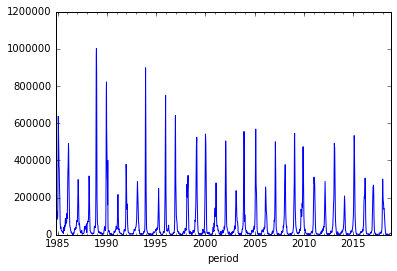

In [9]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

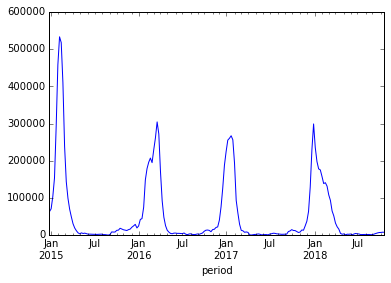

In [10]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er août de l'année $N$ au
1er août de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er août de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er août.

Comme l'incidence de syndrome grippal est très faible en été, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent an octobre 1984, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1985.

In [11]:
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [12]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

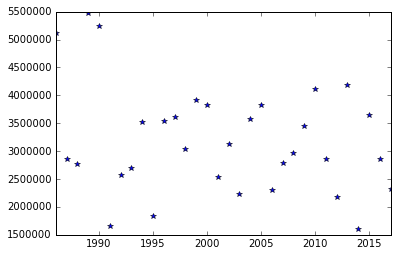

In [13]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [14]:
yearly_incidence.sort_values()

2014    1600941
1991    1659249
1995    1840410
2012    2175217
2003    2234584
2006    2307352
2017    2321583
2001    2529279
1992    2574578
1993    2703886
1988    2765617
2007    2780164
1987    2855570
2016    2856393
2011    2857040
2008    2973918
1998    3034904
2002    3125418
2009    3444020
1994    3514763
1996    3539413
2004    3567744
1997    3620066
2015    3654892
2000    3826372
2005    3835025
1999    3908112
2010    4111392
2013    4182691
1986    5115251
1990    5235827
1989    5466192
dtype: int64

Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population
  française, sont assez rares: il y en eu trois au cours des 35 dernières années.

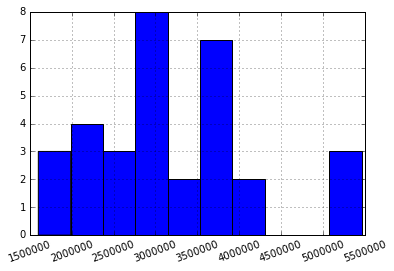

In [15]:
yearly_incidence.hist(xrot=20)